In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# download datasets from repository
import urllib.request
url = 'https://www.dropbox.com/scl/fi/9fbb4u8lveep8rge8bbkx/kain-tapis.zip?rlkey=lhpmcyd7stjfnnpka8tw0l9z0&dl=1'
urllib.request.urlretrieve(url, 'kain-tapis.zip')

('kain-tapis.zip', <http.client.HTTPMessage at 0x7f10856fd300>)

In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print("\nTraining Stopped!")
      self.model.stop_training = True

In [5]:
import zipfile
local_zip = 'kain-tapis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
train_dir = 'kain-tapis'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    class_mode='categorical',
    subset='validation'
)

Found 434 images belonging to 3 classes.
Found 287 images belonging to 3 classes.


In [20]:
def model():
  model = keras.models.Sequential([
      keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(180, 180, 3)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(32, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(64, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(128, (3,3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Dropout(0.2),
      keras.layers.Flatten(),
      keras.layers.Dense(1024, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(3, activation='softmax')
  ])

  model.summary()
  callbacks=myCallback()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(
      train_generator,
      epochs=25,
      validation_data=validation_generator,
      callbacks=[callbacks],
      verbose=1
  )

  return model

In [21]:
history = model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 89, 89, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 43, 43, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 20, 20, 64)       

# Testing Model

Saving pucuk rebung-73.jpg to pucuk rebung-73.jpg
1/1 [==============================] - 0s 32ms/step
pucuk rebung-73.jpg
Pucuk Rebung


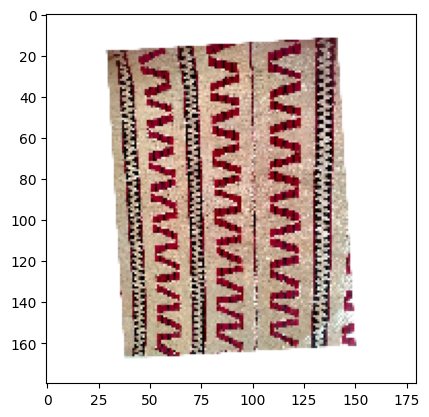

In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(180,180))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = history.predict(images, batch_size=10)

  print(fn)
  if (classes[0][0] == 1) :
    print("Lasem")
  elif (classes[0][1] == 1) :
    print("Lima Sekebar")
  elif (classes[0][2] == 1) :
    print("Pucuk Rebung")

# Save Model

In [38]:
history.save('model_deploy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
